In [182]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [12, 8]
sns.set_style('darkgrid')
%matplotlib inline

In [183]:
# %pip install xlrd
# plt.rcParams.keys()

In [184]:
cab_data = pd.read_csv('Dataset/Cab_Data.csv')
city = pd.read_csv('Dataset/City.csv')
customer_id = pd.read_csv('Dataset/Customer_ID.csv')
transaction_id = pd.read_csv('Dataset/Transaction_ID.csv')

print(cab_data.shape,
city.shape,
customer_id.shape,
transaction_id.shape)

(359392, 7) (20, 3) (49171, 4) (440098, 3)


In [185]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [186]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [187]:
customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [188]:
transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


# Merge

`Cab_Data.csv` is a transaction data, so i will join it by `Cab_Data.csv`

I don't use the `City.csv`, because I think I don't need that

I will merge `Transaction_ID.csv` and `Customer_ID.csv`, and the result will be merged with `Cab_Data.csv`

In [189]:
df_temp = pd.merge(transaction_id, customer_id, on='Customer ID', how='left')
df_temp.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


In [190]:
df_used = pd.merge(cab_data, df_temp, on='Transaction ID', how='left')
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [191]:
df_used.shape

(359392, 12)

# Data Used

In [192]:
df_used.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242


# Check the Data Integrity and Cleaning the Data

In [193]:
df_used.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [194]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

It seems the `City.csv` need to be fixed, the population column should be int

In [195]:
city['Population'] = city['Population'].apply(lambda x: int(x.replace(',','')))
city['Users'] = city['Users'].apply(lambda x: int(x.replace(',','')))
city.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [196]:
df_used.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [197]:
city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

The data don't have the null value

In [198]:
df_used.duplicated().sum()

0

There are no duplicated data

Change the date in the `df_used` Date of Travel columns

The `Date of Trave` is Ms. Excel Serial Number

In [199]:
df_used.dtypes

Transaction ID          int64
Date of Travel          int64
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
dtype: object

In [200]:
df_used['Date of Travel'] = df_used['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df_used

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


In [201]:
# df_used['Date of Travel'] = pd.to_datetime(df_used['Date of Travel'])
df_used.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
dtype: object

# Combine with US holidays dataset

In [202]:
us_holiday = pd.read_csv('Dataset/US Holiday Dates (2004-2021).csv')
us_holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [203]:
us_holiday.dtypes

Date       object
Holiday    object
WeekDay    object
Month       int64
Day         int64
Year        int64
dtype: object

In [204]:
# df_used['Date of Travel'] = df_used['Date of Travel'].astype('object')
# df_used['Date of Travel'].dtypes

In [205]:
us_holiday['Date'] = pd.to_datetime(us_holiday['Date'])
us_holiday.dtypes

Date       datetime64[ns]
Holiday            object
WeekDay            object
Month               int64
Day                 int64
Year                int64
dtype: object

In [206]:
df_used = pd.merge(df_used, us_holiday, left_on=['Date of Travel'], right_on=['Date'], how='left')
df_used.shape

(359854, 18)

In [207]:
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Holiday,WeekDay,Month,Day,Year
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,NaT,NaN,NaN,NaN,NaN,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,NaT,NaN,NaN,NaN,NaN,NaN
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,NaT,NaN,NaN,NaN,NaN,NaN
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,NaT,NaN,NaN,NaN,NaN,NaN
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,NaT,NaN,NaN,NaN,NaN,NaN


In [208]:
df_used = df_used.drop(['Date', 'WeekDay', 'Month', 'Day', 'Year'], axis=1)
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,NaN
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,NaN
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,NaN
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,NaN
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,NaN


In [209]:
df_used['Holiday'].value_counts()

Holiday
Labor Day Weekend              3364
Christmas Eve                  2011
New Year’s Eve                 1786
Christmas Day                  1331
New Year's Day                 1260
Thanksgiving Day               1166
Eastern Easter                 1040
Veterans Day                   1012
Western Easter                  965
Thanksgiving Eve                863
Juneteenth                      747
Columbus Day                    673
Labor Day                       666
Valentine’s Day                 656
Memorial Day                    449
4th of July                     447
Washington's Birthday           345
Martin Luther King, Jr. Day     325
Name: count, dtype: int64

In [210]:
df_used.isna().sum()

Transaction ID             0
Date of Travel             0
Company                    0
City                       0
KM Travelled               0
Price Charged              0
Cost of Trip               0
Customer ID                0
Payment_Mode               0
Gender                     0
Age                        0
Income (USD/Month)         0
Holiday               340748
dtype: int64

In [211]:
df_used['Holiday'] = df_used['Holiday'].fillna('non Holiday')
df_used.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Holiday               0
dtype: int64

In [212]:
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday


The data seems good

# Feature Engineering

Make the `profit` columns.

Price Charged - Cost of Trip

In [213]:
df_used.describe().T

,count,mean,min,25%,50%,75%,max,std
Transaction ID,359854.0,10220689.89583,10000011.0,10110925.25,10220804.5,10330821.75,10440107.0,126739.982588
Date of Travel,359854,2017-08-16 21:50:23.726289152,2016-01-02 00:00:00,2016-11-24 00:00:00,2017-09-09 00:00:00,2018-05-11 00:00:00,2018-12-31 00:00:00,NaN
KM Travelled,359854.0,22.567304,1.9,12.0,22.44,32.96,48.0,12.232944
Price Charged,359854.0,423.517722,15.6,206.5,386.425,583.74,2048.03,274.455816
Cost of Trip,359854.0,286.196987,19.0,151.2,282.48,413.6832,691.2,157.989831
Customer ID,359854.0,19194.701346,1.0,2705.0,7459.0,36087.75,60000.0,21014.265474
Age,359854.0,35.336448,18.0,25.0,33.0,42.0,65.0,12.594056
Income (USD/Month),359854.0,15048.269943,2000.0,8419.0,14684.5,21034.0,35000.0,7969.495205


In [214]:
df_used['Profit'] = df_used['Price Charged'] - df_used['Cost of Trip']
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844


I want to make age group, but I want to see the distributions first

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


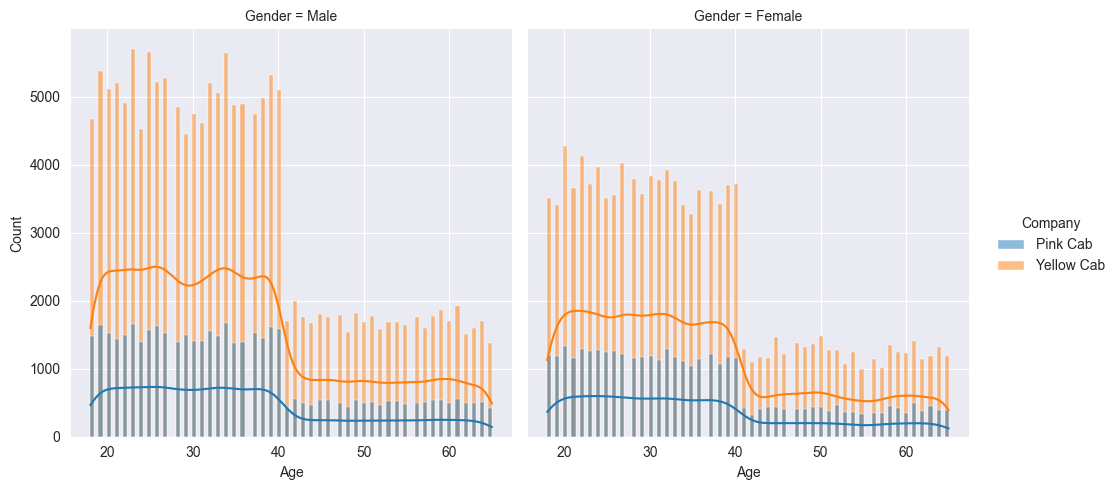

In [215]:
# plt.title('Distribution of  Age by Gender and Company')
sns.displot(df_used, x='Age', hue='Company', col='Gender', kde=True)
plt.show()

The majority customer of both company is under 40 years old for male and female. The minimum age is 18, and the maximum is 65

In [216]:
bins = [18, 24, 29, 34, 39, 44, 49, 54, 60, 100]
labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60+']

df_used['Age Group'] = pd.cut(df_used['Age'], bins=bins, labels=labels, right=False)
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit,Age Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315,25-29
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666,25-29
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568,50-54
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798,18-24
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844,30-34


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


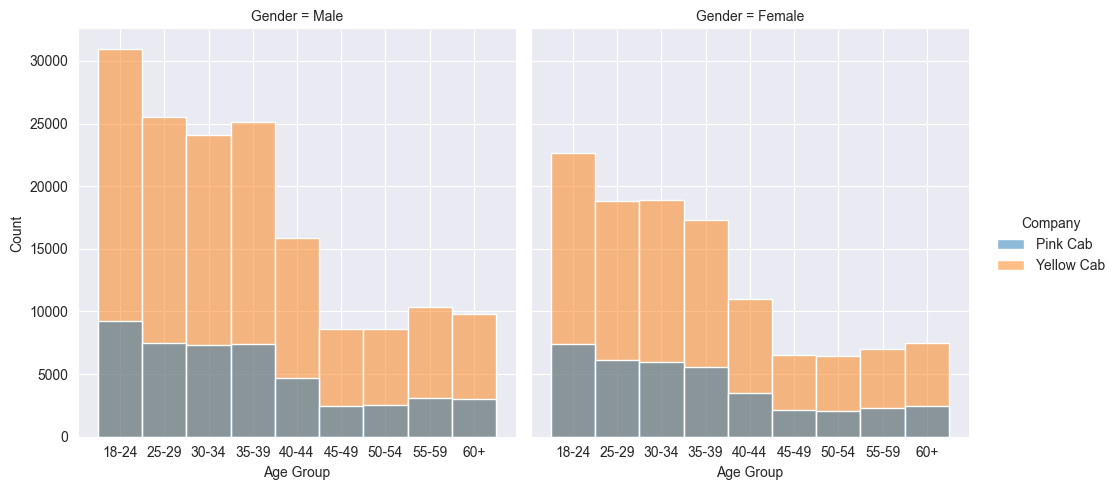

In [217]:
sns.displot(df_used, x='Age Group', hue='Company', col='Gender')
plt.show()

Make the month, year, and year-month columns

In [218]:
df_used['Month'] = pd.DatetimeIndex(df_used['Date of Travel']).month
df_used['Year'] = pd.DatetimeIndex(df_used['Date of Travel']).year
# df_used['Year-Month'] = pd.to_datetime(df_used['Date of Travel']).dt.to_period('M')
df_used['Year-Month'] = df_used['Date of Travel'].dt.strftime('%Y-%m')

df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit,Age Group,Month,Year,Year-Month
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315,25-29,1,2016,2016-01
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666,25-29,1,2016,2016-01
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568,50-54,1,2016,2016-01
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798,18-24,1,2016,2016-01
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844,30-34,1,2016,2016-01


Make the Income Group

In [219]:
df_used['Income (USD/Month)'].describe()

count    359854.000000
mean      15048.269943
std        7969.495205
min        2000.000000
25%        8419.000000
50%       14684.500000
75%       21034.000000
max       35000.000000
Name: Income (USD/Month), dtype: float64

In [220]:
bins = [2000, 7999, 14999, 21999, 34999, 100000]
labels = ['2000 - 7999', '8000 - 14999', '15000 - 21999', '22000 - 34999', '>35000']

df_used['Income Group'] = pd.cut(df_used['Income (USD/Month)'], bins=bins, labels=labels, right=False)
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit,Age Group,Month,Year,Year-Month,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315,25-29,1,2016,2016-01,8000 - 14999
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666,25-29,1,2016,2016-01,8000 - 14999
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568,50-54,1,2016,2016-01,8000 - 14999
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798,18-24,1,2016,2016-01,22000 - 34999
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844,30-34,1,2016,2016-01,8000 - 14999


# EDA and Statistical Analysis

In [221]:
df_used.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Holiday                       object
Profit                       float64
Age Group                   category
Month                          int32
Year                           int32
Year-Month                    object
Income Group                category
dtype: object

In [222]:
# num_cols = df_used.select_dtypes(include=['number'])
num_cols = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Profit']
cat_cols = ['Company', 'City', 'Payment_Mode', 'Gender', 'Holiday', 'Age Group']
df_used[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
KM Travelled,359854.0,22.567304,12.232944,1.90,12.0000,22.4400,32.9600,48.000
Price Charged,359854.0,423.517722,274.455816,15.60,206.5000,386.4250,583.7400,2048.030
Cost of Trip,359854.0,286.196987,157.989831,19.00,151.2000,282.4800,413.6832,691.200
Age,359854.0,35.336448,12.594056,18.00,25.0000,33.0000,42.0000,65.000
Income (USD/Month),359854.0,15048.269943,7969.495205,2000.00,8419.0000,14684.5000,21034.0000,35000.000
Profit,359854.0,137.320735,160.416242,-220.06,28.0165,81.9904,190.1294,1463.966


In [223]:
for i in cat_cols:
    print(f"Unique value of {df_used[i].value_counts()}, \n")

Unique value of Company
Yellow Cab    275069
Pink Cab       84785
Name: count, dtype: int64, 

Unique value of City
NEW YORK NY       100004
CHICAGO IL         56699
LOS ANGELES CA     48088
WASHINGTON DC      43811
BOSTON MA          29741
SAN DIEGO CA       20513
SILICON VALLEY      8528
SEATTLE WA          8004
ATLANTA GA          7569
DALLAS TX           7024
MIAMI FL            6461
AUSTIN TX           4899
ORANGE COUNTY       3986
DENVER CO           3831
NASHVILLE TN        3013
SACRAMENTO CA       2372
PHOENIX AZ          2065
TUCSON AZ           1933
PITTSBURGH PA       1313
Name: count, dtype: int64, 

Unique value of Payment_Mode
Card    215777
Cash    144077
Name: count, dtype: int64, 

Unique value of Gender
Male      206170
Female    153684
Name: count, dtype: int64, 

Unique value of Holiday
non Holiday                    340748
Labor Day Weekend                3364
Christmas Eve                    2011
New Year’s Eve                   1786
Christmas Day                 

## EDA for City.csv

In [224]:
city.head()

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [225]:
city.dtypes

City          object
Population     int64
Users          int64
dtype: object

In [226]:
city.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,20.0,1231592.00,1.740127e+06,248968.0,608637.25,784559.0,1067041.0,8405837.0
Users,20.0,64520.65,8.349938e+04,3643.0,11633.25,23429.0,91766.0,302149.0


In [227]:
city.value_counts()

City              Population  Users 
ATLANTA GA        814885      24701     1
AUSTIN TX         698371      14978     1
TUCSON AZ         631442      5712      1
SILICON VALLEY    1177609     27247     1
SEATTLE WA        671238      25063     1
SAN FRANCISCO CA  629591      213609    1
SAN DIEGO CA      959307      69995     1
SACRAMENTO CA     545776      7044      1
PITTSBURGH PA     542085      3643      1
PHOENIX AZ        943999      6133      1
ORANGE COUNTY     1030185     12994     1
NEW YORK NY       8405837     302149    1
NASHVILLE TN      327225      9270      1
MIAMI FL          1339155     17675     1
LOS ANGELES CA    1595037     144132    1
DENVER CO         754233      12421     1
DALLAS TX         942908      22157     1
CHICAGO IL        1955130     164468    1
BOSTON MA         248968      80021     1
WASHINGTON DC     418859      127001    1
Name: count, dtype: int64

In [228]:
df_melted = pd.melt(city, id_vars=['City'], value_vars=['Population', 'Users'], 
                    var_name='Category', value_name='Values')

df_melted.head()

,City,Category,Values
0,NEW YORK NY,Population,8405837
1,CHICAGO IL,Population,1955130
2,LOS ANGELES CA,Population,1595037
3,MIAMI FL,Population,1339155
4,SILICON VALLEY,Population,1177609


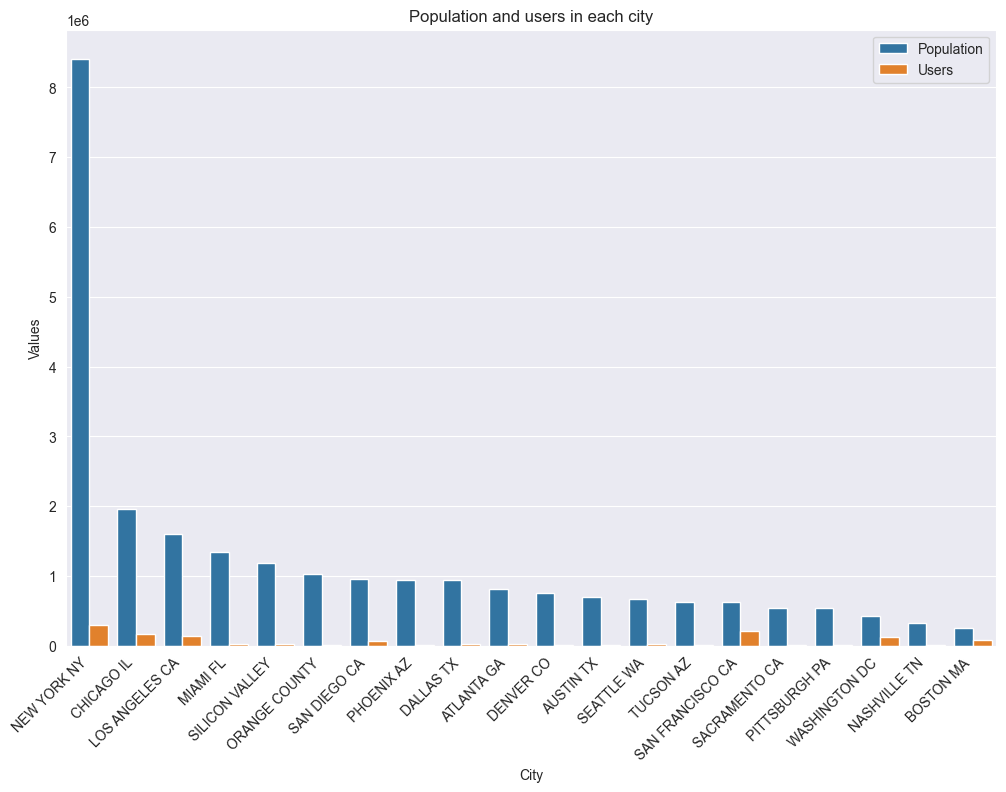

In [229]:
ax = sns.barplot(data=df_melted, x='City', y='Values', hue='Category')
plt.title('Population and users in each city')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend()
plt.show()

I want to see percentage of users based on population in each city (Conversion rate)

In [230]:
city['Users percentage'] = (city['Users'] / city['Population']) * 100
city.head(20).sort_values(by='Users percentage', ascending=False)

,City,Population,Users,Users percentage
14,SAN FRANCISCO CA,629591,213609,33.928217
19,BOSTON MA,248968,80021,32.141078
17,WASHINGTON DC,418859,127001,30.320705
2,LOS ANGELES CA,1595037,144132,9.036279
1,CHICAGO IL,1955130,164468,8.412126
6,SAN DIEGO CA,959307,69995,7.296413
12,SEATTLE WA,671238,25063,3.733847
0,NEW YORK NY,8405837,302149,3.594514
9,ATLANTA GA,814885,24701,3.031225
18,NASHVILLE TN,327225,9270,2.832913


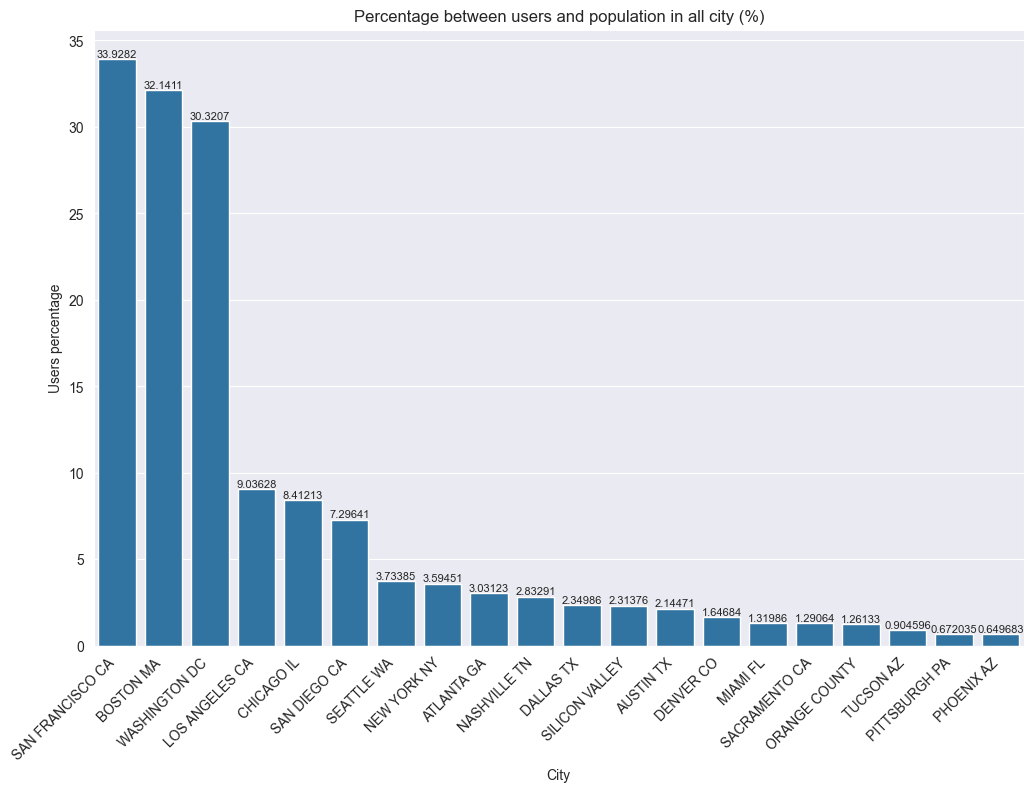

In [231]:
ax = sns.barplot(city.sort_values(by='Users percentage', ascending=False), y='Users percentage', x='City')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Percentage between users and population in all city (%)')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

More than 30% of population in San Francisco, Boston, and Washington DC are cab users

## EDA for Merged Data

Check the Cab Company

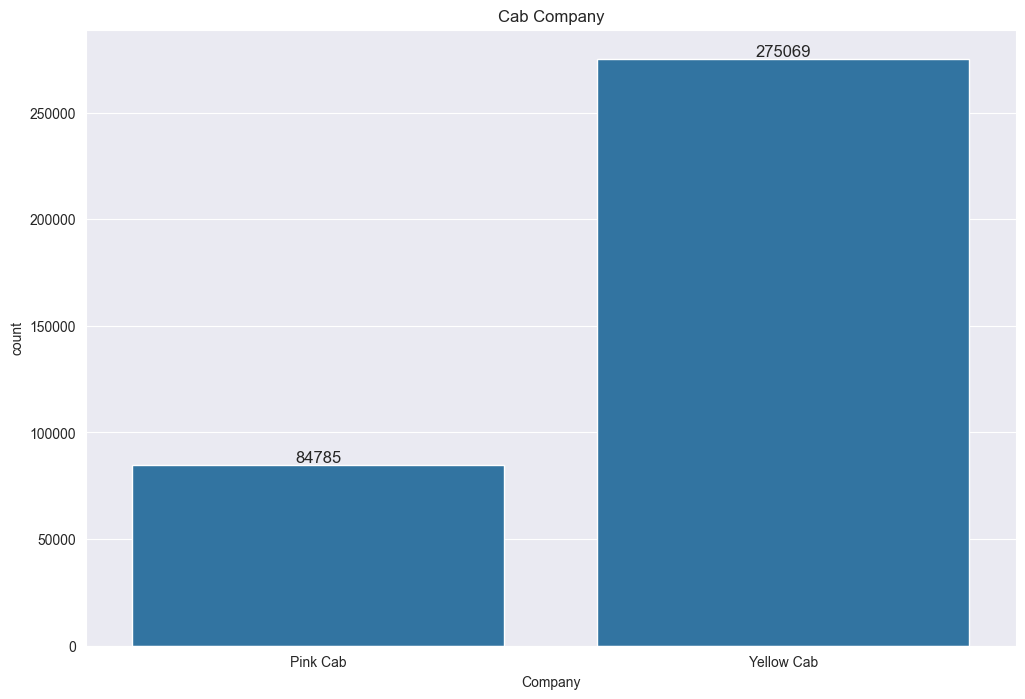

In [232]:
ax = sns.countplot(df_used, x='Company')
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Cab Company')
plt.show()

In [233]:
df_grouped = df_used.groupby(['Company', 'City']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_grouped.head()

,Company,City,Count
28,Yellow Cab,NEW YORK NY,86030
22,Yellow Cab,CHICAGO IL,47330
37,Yellow Cab,WASHINGTON DC,40113
25,Yellow Cab,LOS ANGELES CA,28208
21,Yellow Cab,BOSTON MA,24550


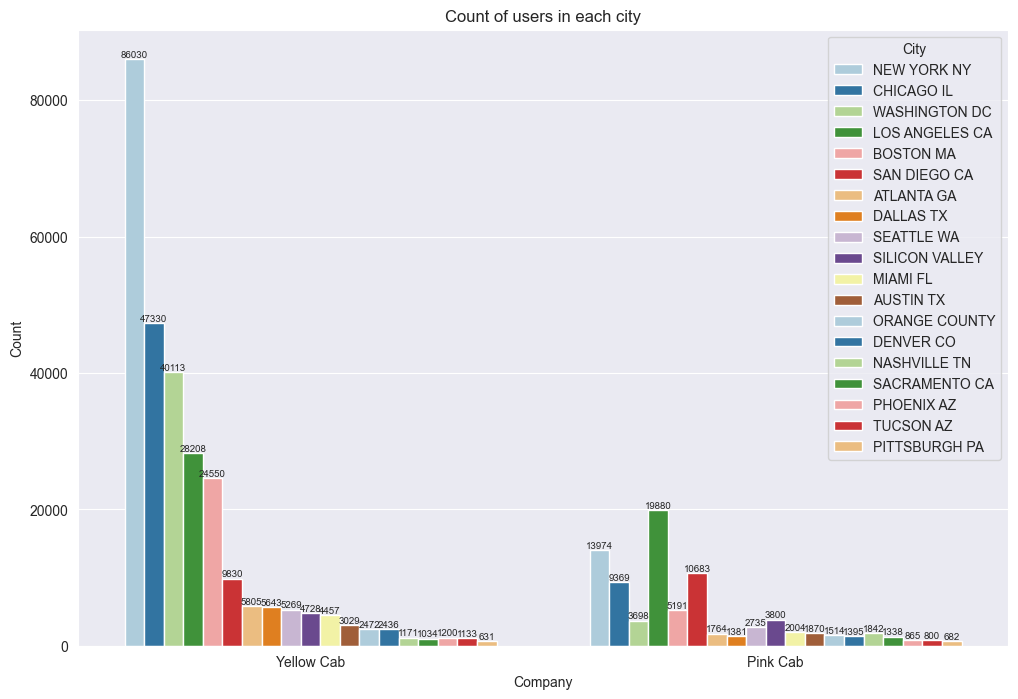

In [234]:
ax = sns.barplot(data=df_grouped, x='Company', y='Count', hue='City', palette='Paired')
plt.title('Count of users in each city')
plt.xlabel('Company')
plt.ylabel('Count')
for i in range(int(len(df_grouped)/2)):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Yellow Cab has most users in New York, Pink Cab has more users in Los Angeles, the difference in the number of users is very high

### Profit Analysis

See profit and KM travelled for each cities

In [235]:
df_grouped = df_used.groupby(['City','Company']).agg({'KM Travelled':'mean', 'Profit':'mean'}).reset_index()
df_grouped.head().sort_values(by='Profit', ascending=False)

,City,Company,KM Travelled,Profit
1,ATLANTA GA,Yellow Cab,22.247742,128.879900
3,AUSTIN TX,Yellow Cab,22.508379,125.233848
2,AUSTIN TX,Pink Cab,21.962444,78.921837
0,ATLANTA GA,Pink Cab,22.528741,54.505425
4,BOSTON MA,Pink Cab,22.738131,50.481148


In [236]:
df_melted = pd.melt(df_grouped, id_vars=['City', 'Company'], value_vars=['KM Travelled', 'Profit'], 
                    var_name='Category', value_name='Values').sort_values(by='Values', ascending=False)

df_melted.head()

,City,Company,Category,Values
57,NEW YORK NY,Yellow Cab,Profit,308.053771
71,SILICON VALLEY,Yellow Cab,Profit,206.816546
47,DALLAS TX,Yellow Cab,Profit,195.917436
49,DENVER CO,Yellow Cab,Profit,147.007125
59,ORANGE COUNTY,Yellow Cab,Profit,143.928757


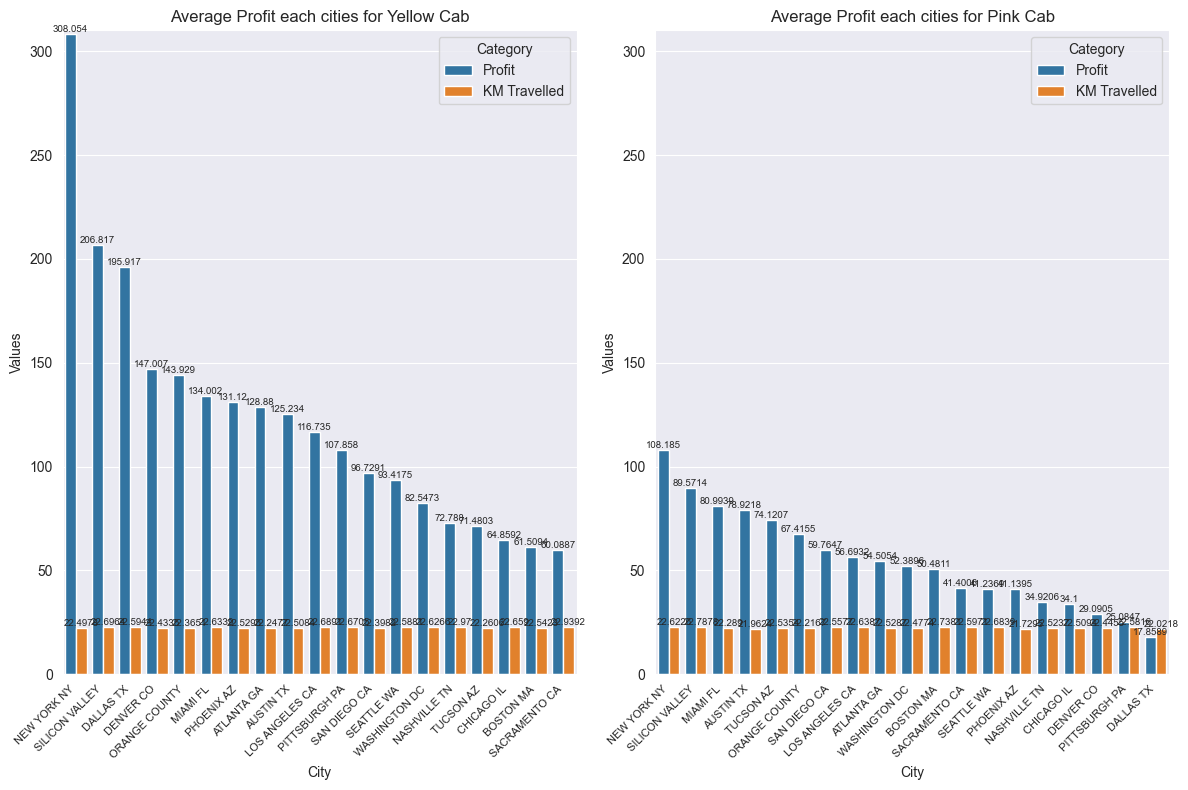

In [237]:
plt.subplot(1, 2, 1)
ax_yellow = sns.barplot(data=df_melted[df_melted['Company']=='Yellow Cab'], y='Values', x='City', hue='Category')
ax_yellow.bar_label(ax_yellow.containers[0], fontsize=7)
ax_yellow.bar_label(ax_yellow.containers[1], fontsize=7)
plt.title('Average Profit each cities for Yellow Cab')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(0, 310)

plt.subplot(1, 2, 2)
ax_pink = sns.barplot(data=df_melted[df_melted['Company']=='Pink Cab'], y='Values', x='City', hue='Category')
ax_pink.bar_label(ax_pink.containers[0], fontsize=7)
ax_pink.bar_label(ax_pink.containers[1], fontsize=7)
plt.title('Average Profit each cities for Pink Cab')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.ylim(0, 310)

plt.tight_layout()
plt.show()

New York provides the highest average profit

Now find the correlation between profit and KM travelled

In [238]:
# sns.scatterplot(data=df_used, x='KM Travelled', y='Price Charged', hue='Company')
# plt.title('Scatter Plot of KM Travelled vs Profit')
# plt.xlabel('KM Travelled')
# plt.ylabel('Price Charged')
# plt.xticks(rotation=45, ha='right', fontsize=8)
# plt.show()

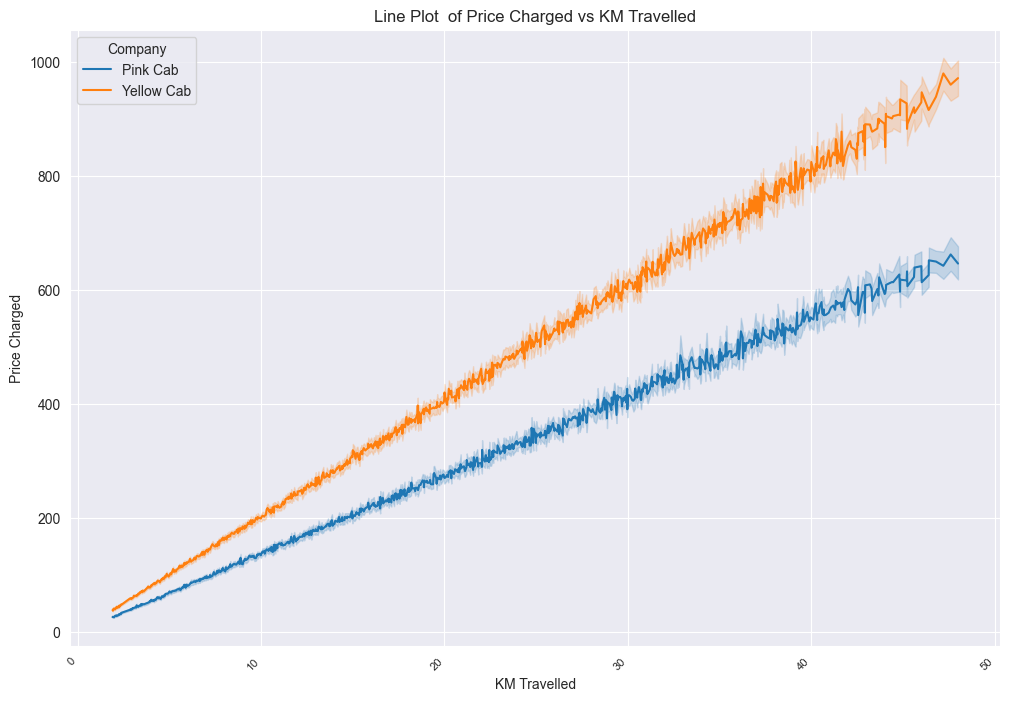

In [239]:
sns.lineplot(data=df_used, x='KM Travelled', y='Price Charged', hue='Company')
plt.title('Line Plot  of Price Charged vs KM Travelled')
plt.xlabel('KM Travelled')
plt.ylabel('Price Charged')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

See sum of the profit for each cab company

In [240]:
df_grouped = df_used.groupby(['Company']).agg({'Profit':['mean', 'sum']}).reset_index()
df_grouped.columns = ['Company', 'Mean Profit', 'Total Profit']
df_grouped.head()

,Company,Mean Profit,Total Profit
0,Pink Cab,62.638377,5.310795e+06
1,Yellow Cab,160.340209,4.410462e+07


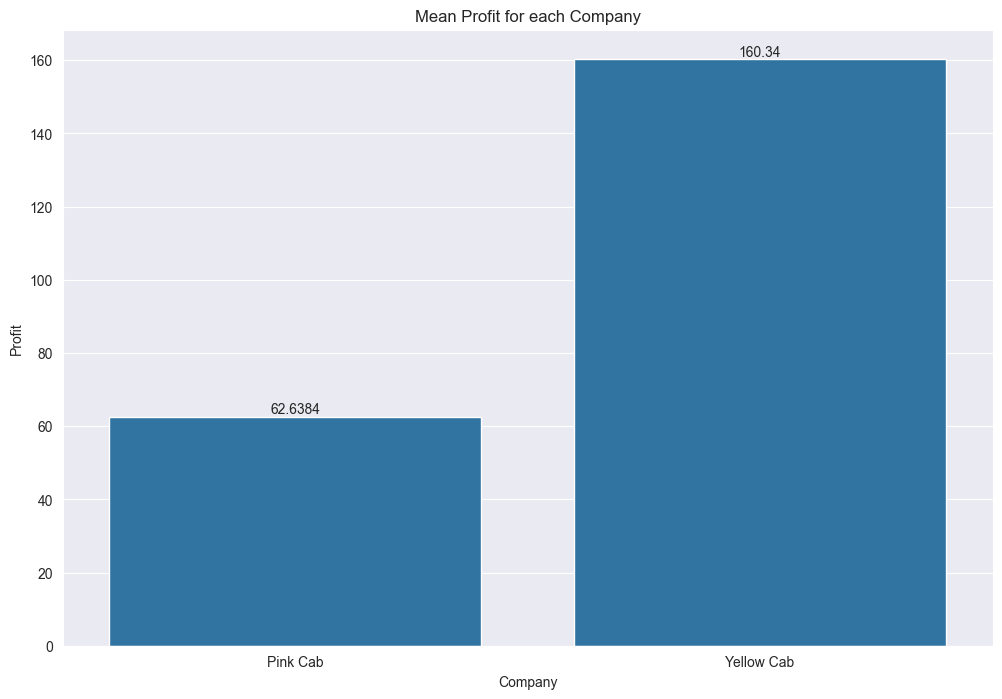

In [241]:
ax = sns.barplot(data=df_grouped, x='Company', y='Mean Profit')
plt.title('Mean Profit for each Company')
plt.xlabel('Company')
plt.ylabel('Profit')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()


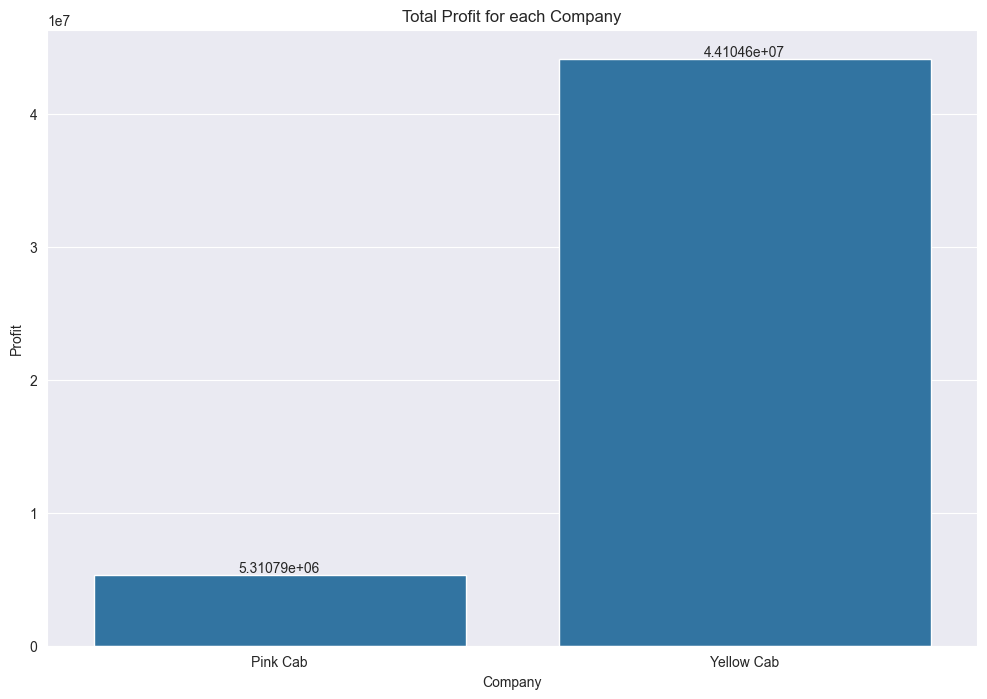

In [242]:
ax = sns.barplot(data=df_grouped, x='Company', y='Total Profit')
plt.title('Total Profit for each Company')
plt.xlabel('Company')
plt.ylabel('Profit')
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

Yellow Cab has more average and total profit than pink cab

In [243]:
df_grouped = df_used.groupby(['Company', 'Payment_Mode']).agg({'Profit':['mean', 'sum']}).reset_index()
df_grouped.columns = ['Company', 'Payment_Mode', 'Mean Profit', 'Total Profit']
df_grouped.head()

,Company,Payment_Mode,Mean Profit,Total Profit
0,Pink Cab,Card,62.702711,3.182727e+06
1,Pink Cab,Cash,62.542405,2.128068e+06
2,Yellow Cab,Card,160.047290,2.641068e+07
3,Yellow Cab,Cash,160.779433,1.769394e+07


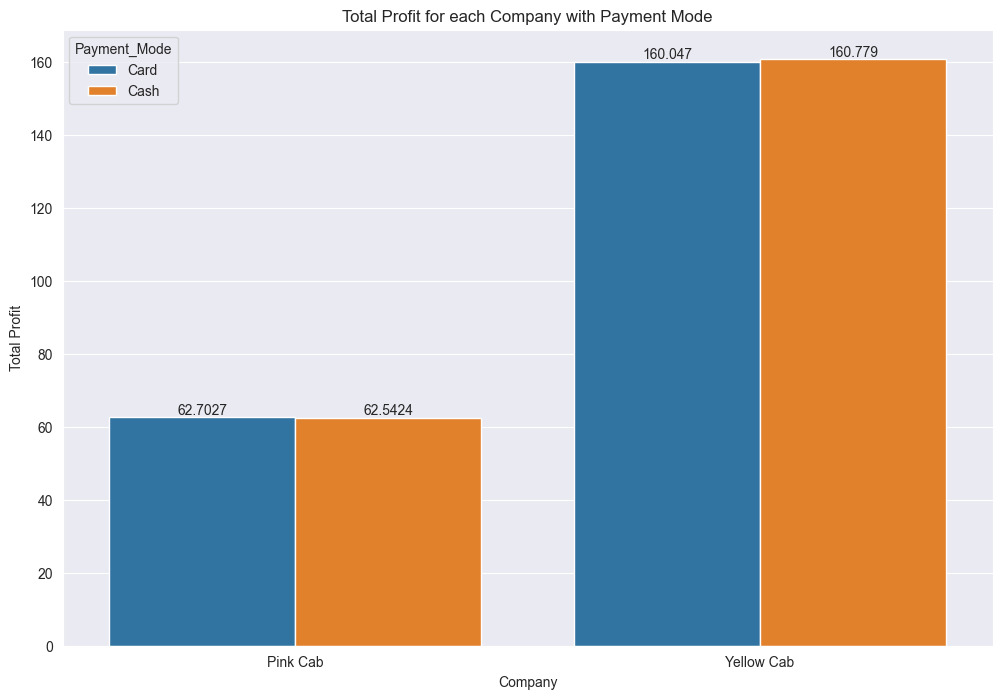

In [244]:
ax = sns.barplot(data=df_grouped, x='Company', y='Mean Profit', hue='Payment_Mode')
plt.title('Total Profit for each Company with Payment Mode')
plt.xlabel('Company')
plt.ylabel('Total Profit')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.show()

The payment method has no influence on profits

In [245]:
df_grouped = df_used.groupby(['Company', 'Payment_Mode']).size().reset_index(name='Total')
df_melted = df_grouped.melt(id_vars=['Company', 'Payment_Mode'], value_vars='Total')
df_melted = df_melted.drop(columns=['variable'])
df_melted.head()

,Company,Payment_Mode,value
0,Pink Cab,Card,50759
1,Pink Cab,Cash,34026
2,Yellow Cab,Card,165018
3,Yellow Cab,Cash,110051


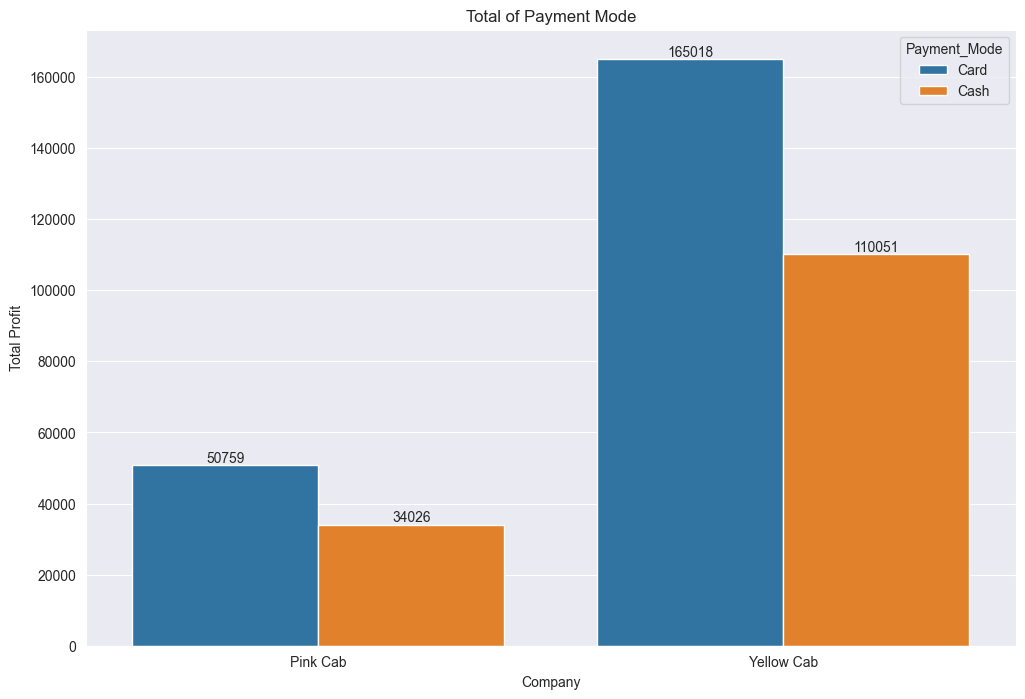

In [246]:
ax = sns.barplot(data=df_melted, x='Company', y='value', hue='Payment_Mode')
plt.title('Total of Payment Mode')
plt.xlabel('Company')
plt.ylabel('Total Profit')
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.show()

Passengers prefer to pay using cards

In [247]:
df_used['Holiday'].value_counts()

Holiday
non Holiday                    340748
Labor Day Weekend                3364
Christmas Eve                    2011
New Year’s Eve                   1786
Christmas Day                    1331
New Year's Day                   1260
Thanksgiving Day                 1166
Eastern Easter                   1040
Veterans Day                     1012
Western Easter                    965
Thanksgiving Eve                  863
Juneteenth                        747
Columbus Day                      673
Labor Day                         666
Valentine’s Day                   656
Memorial Day                      449
4th of July                       447
Washington's Birthday             345
Martin Luther King, Jr. Day       325
Name: count, dtype: int64

In [248]:
# Exclude non-holiday and weekend
df_grouped = df_used[(df_used['Holiday'] != 'non Holiday') & (~df_used['Holiday'].str.contains('Weekend'))].groupby(['Company', 'Holiday']).agg({'Profit':'sum'}).reset_index().sort_values(by='Profit', ascending=False)
df_grouped.head()

,Company,Holiday,Profit
19,Yellow Cab,Christmas Eve,272099.1292
27,Yellow Cab,New Year’s Eve,219227.9456
21,Yellow Cab,Eastern Easter,193955.7368
26,Yellow Cab,New Year's Day,182071.2656
33,Yellow Cab,Western Easter,155803.5700


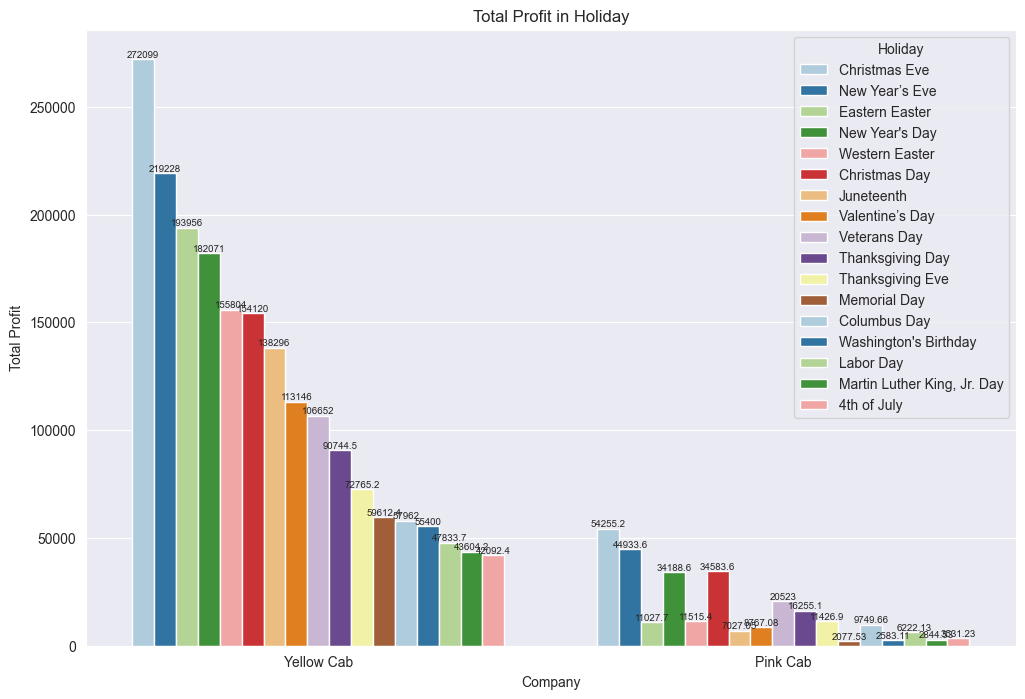

In [249]:
ax = sns.barplot(data=df_grouped, x='Company', y='Profit', hue='Holiday', palette='Paired')
plt.title('Total Profit in Holiday')
plt.xlabel('Company')
plt.ylabel('Total Profit')
for i in range(17):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Christmas Eve holiday give the most profit

In [250]:
df_grouped = df_used.groupby(['Company', 'Holiday']).agg({'Profit':'mean'}).reset_index().sort_values(by='Profit', ascending=False)
df_grouped.columns = ['Company', 'Holiday', 'Mean Profit']
df_grouped.head()

,Company,Holiday,Mean Profit
24,Yellow Cab,Juneteenth,240.514916
23,Yellow Cab,Eastern Easter,227.380700
33,Yellow Cab,Valentine’s Day,215.106862
36,Yellow Cab,Western Easter,196.226159
29,Yellow Cab,New Year's Day,188.479571


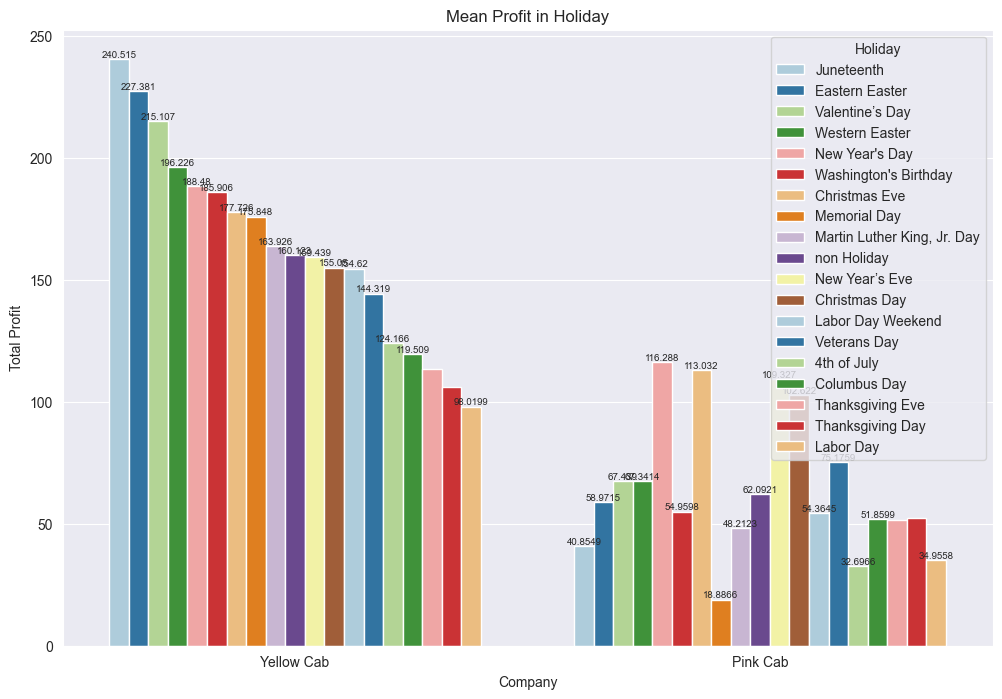

In [251]:
ax = sns.barplot(data=df_grouped, x='Company', y='Mean Profit', hue='Holiday', palette='Paired')
plt.title('Mean Profit in Holiday')
plt.xlabel('Company')
plt.ylabel('Total Profit')
for i in range(17):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

In [257]:
df_copy = df_used[['Company', 'Holiday', 'Profit']].copy()
df_copy['Holiday'].unique()

array(['non Holiday', 'Martin Luther King, Jr. Day', 'Valentine’s Day',
       "Washington's Birthday", 'Western Easter', 'Eastern Easter',
       'Memorial Day', 'Juneteenth', '4th of July', 'Labor Day',
       'Labor Day Weekend', 'Columbus Day', 'Veterans Day',
       'Thanksgiving Eve', 'Thanksgiving Day', 'Christmas Eve',
       'Christmas Day', "New Year's Day", 'New Year’s Eve'], dtype=object)

In [258]:
df_copy['Holiday'] = df_copy['Holiday'].replace(['Martin Luther King, Jr. Day', 'Valentine’s Day',
       "Washington's Birthday", 'Western Easter', 'Eastern Easter',
       'Memorial Day', 'Juneteenth', '4th of July', 'Labor Day',
       'Labor Day Weekend', 'Columbus Day', 'Veterans Day',
       'Thanksgiving Eve', 'Thanksgiving Day', 'Christmas Eve',
       'Christmas Day', "New Year's Day", 'New Year’s Eve'], 'Holiday')
df_copy.head()

,Company,Holiday,Profit
0,Pink Cab,non Holiday,57.315
1,Pink Cab,non Holiday,23.666
2,Pink Cab,non Holiday,27.568
3,Pink Cab,non Holiday,25.798
4,Pink Cab,non Holiday,16.844


In [259]:
df_grouped = df_copy.groupby(['Company', 'Holiday']).agg({'Profit':'mean'}).reset_index()
df_grouped.head()

,Company,Holiday,Profit
0,Pink Cab,Holiday,72.215296
1,Pink Cab,non Holiday,62.092130
2,Yellow Cab,Holiday,164.236786
3,Yellow Cab,non Holiday,160.122885


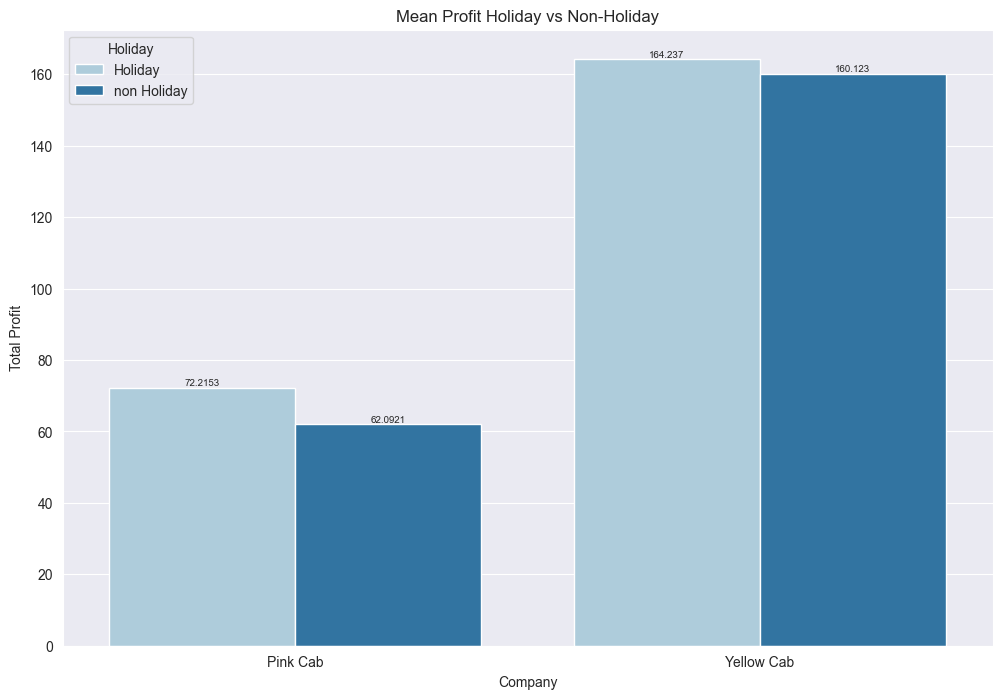

In [261]:
ax = sns.barplot(data=df_grouped, x='Company', y='Profit', hue='Holiday', palette='Paired')
plt.title('Mean Profit Holiday vs Non-Holiday')
plt.xlabel('Company')
plt.ylabel('Total Profit')
for i in range(2):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Holiday give more profit

Profit by Income group

In [67]:
df_grouped = df_used.groupby(['Company', 'Income Group']).size().reset_index(name='Count of Income Group')
df_grouped.head()

,Company,Income Group,Count of Income Group
0,Pink Cab,2000 - 7999,19893
1,Pink Cab,8000 - 14999,23399
2,Pink Cab,15000 - 21999,23497
3,Pink Cab,22000 - 34999,17995
4,Pink Cab,>35000,1


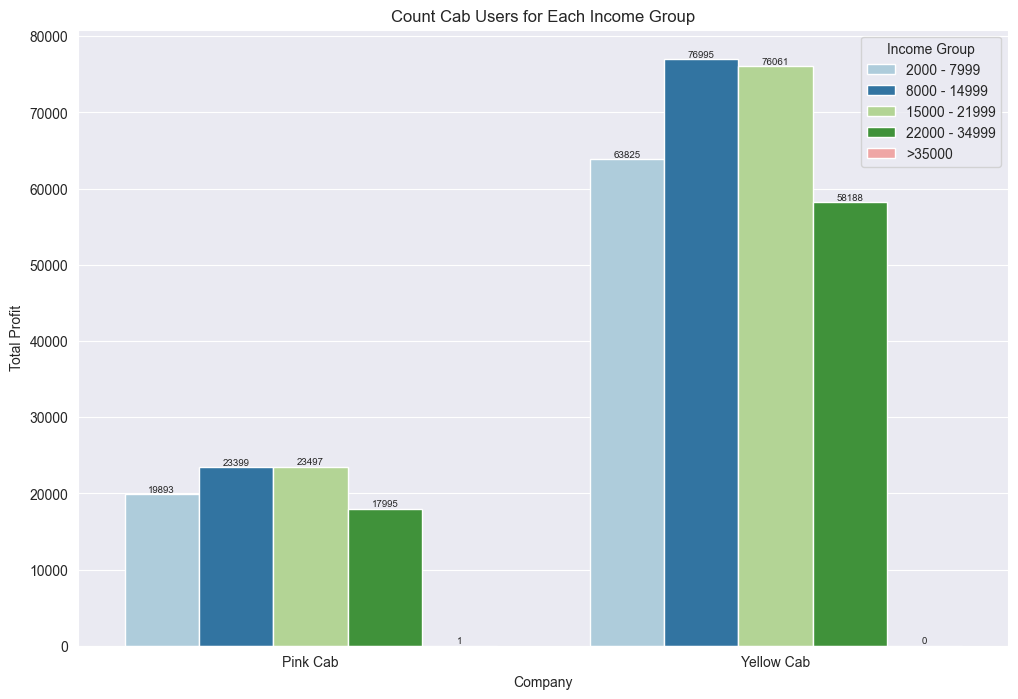

In [68]:
ax = sns.barplot(data=df_grouped, x='Company', y='Count of Income Group', hue='Income Group', palette='Paired')
plt.title('Count Cab Users for Each Income Group')
plt.xlabel('Company')
plt.ylabel('Total Profit')
for i in range(int(len(df_grouped)/2)):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Most of cab users have an income of 8000 - 21999 USD per month

In [69]:
df_grouped = df_used.groupby(['Company', 'Income Group']).agg({'Profit':'sum'}).reset_index()
df_grouped.head()

,Company,Income Group,Profit
0,Pink Cab,2000 - 7999,1237251.500
1,Pink Cab,8000 - 14999,1451378.349
2,Pink Cab,15000 - 21999,1478723.480
3,Pink Cab,22000 - 34999,1143416.493
4,Pink Cab,>35000,24.940


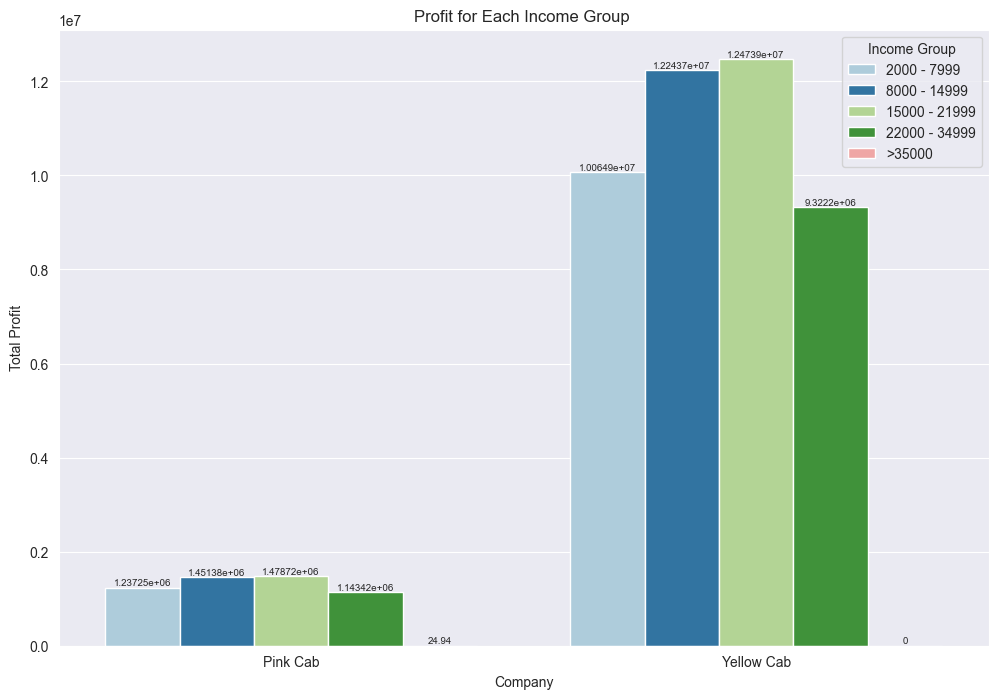

In [70]:
ax = sns.barplot(data=df_grouped, x='Company', y='Profit', hue='Income Group', palette='Paired')
plt.title('Profit for Each Income Group ')
plt.xlabel('Company')
plt.ylabel('Total Profit')
for i in range(int(len(df_grouped)/2)):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Person with Income 8000 - 21999 USD per month give the most profit

Profit per Age

In [71]:
df_grouped = df_used.groupby(['Company', 'Age Group']).size().reset_index(name='Count of Age Group')
df_grouped.head()

,Company,Age Group,Count of Age Group
0,Pink Cab,18-24,16653
1,Pink Cab,25-29,13675
2,Pink Cab,30-34,13302
3,Pink Cab,35-39,13009
4,Pink Cab,40-44,8163


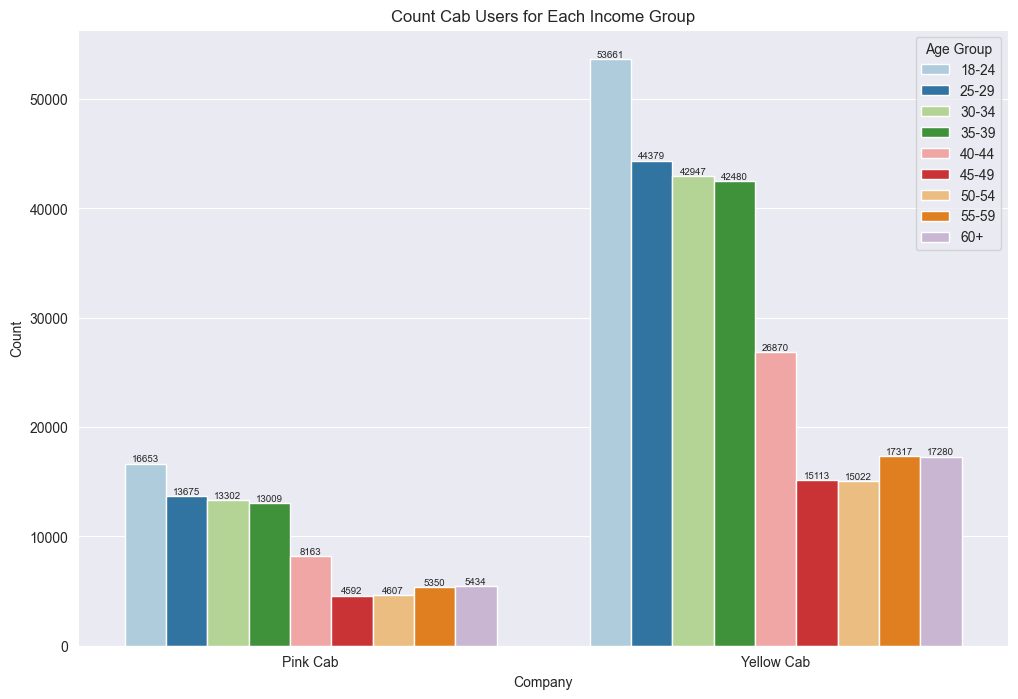

In [72]:
ax = sns.barplot(data=df_grouped, x='Company', y='Count of Age Group', hue='Age Group', palette='Paired')
plt.title('Count Cab Users for Each Income Group')
plt.xlabel('Company')
plt.ylabel('Count')
for i in range(int(len(df_grouped)/2)):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Most of cab users was 18 - 24 years old

In [73]:
df_grouped = df_used.groupby(['Company', 'Age Group']).agg({'Profit':'sum'}).reset_index()
df_grouped.head()

,Company,Age Group,Profit
0,Pink Cab,18-24,1063856.798
1,Pink Cab,25-29,854661.236
2,Pink Cab,30-34,836081.133
3,Pink Cab,35-39,813575.082
4,Pink Cab,40-44,498956.436


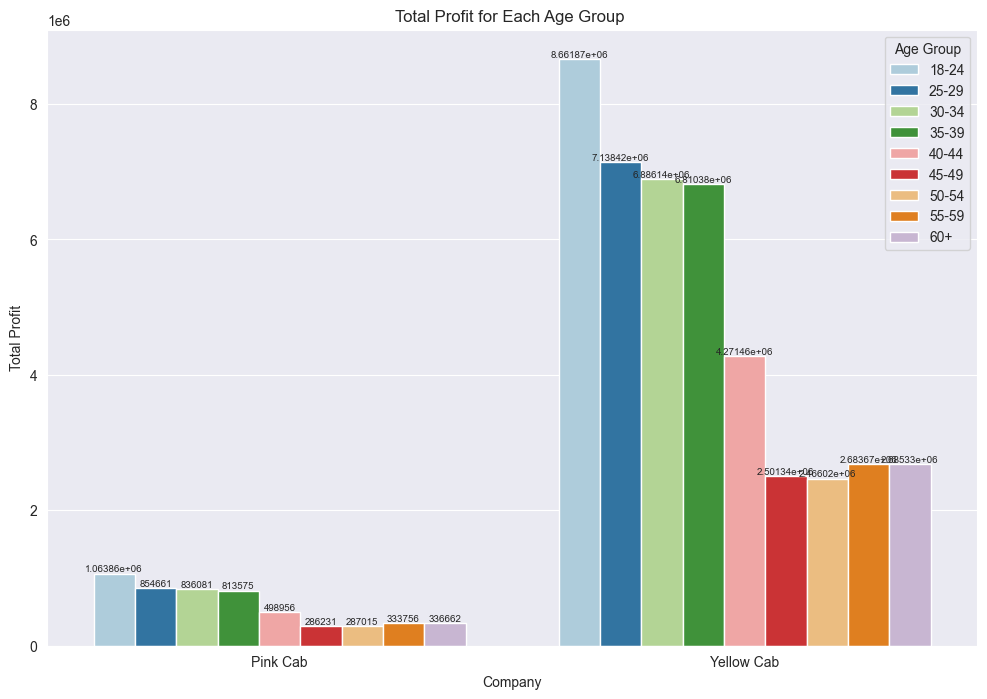

In [74]:
ax = sns.barplot(data=df_grouped, x='Company', y='Profit', hue='Age Group', palette='Paired')
plt.title('Total Profit for Each Age Group ')
plt.xlabel('Company')
plt.ylabel('Total Profit')
for i in range(int(len(df_grouped)/2)):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

Age 18-24 give the most profit for both cab

Check for profit < 0

In [75]:
df_grouped_loss = df_used[df_used['Profit']<0].groupby(['Company']).size().reset_index(name='Count of Loss')
df_grouped_loss.head()

,Company,Count of Loss
0,Pink Cab,11144
1,Yellow Cab,13710


In [76]:
df_grouped_total = df_used.groupby(['Company']).size().reset_index(name='Total Transaction')
df_grouped_total.head()

,Company,Total Transaction
0,Pink Cab,84785
1,Yellow Cab,275069


In [77]:
df_merged = pd.merge(df_grouped_loss, df_grouped_total, on='Company')
df_merged['Percentage Loss'] = (df_merged['Count of Loss'] / df_merged['Total Transaction']) * 100
df_merged.head()

,Company,Count of Loss,Total Transaction,Percentage Loss
0,Pink Cab,11144,84785,13.143834
1,Yellow Cab,13710,275069,4.984204


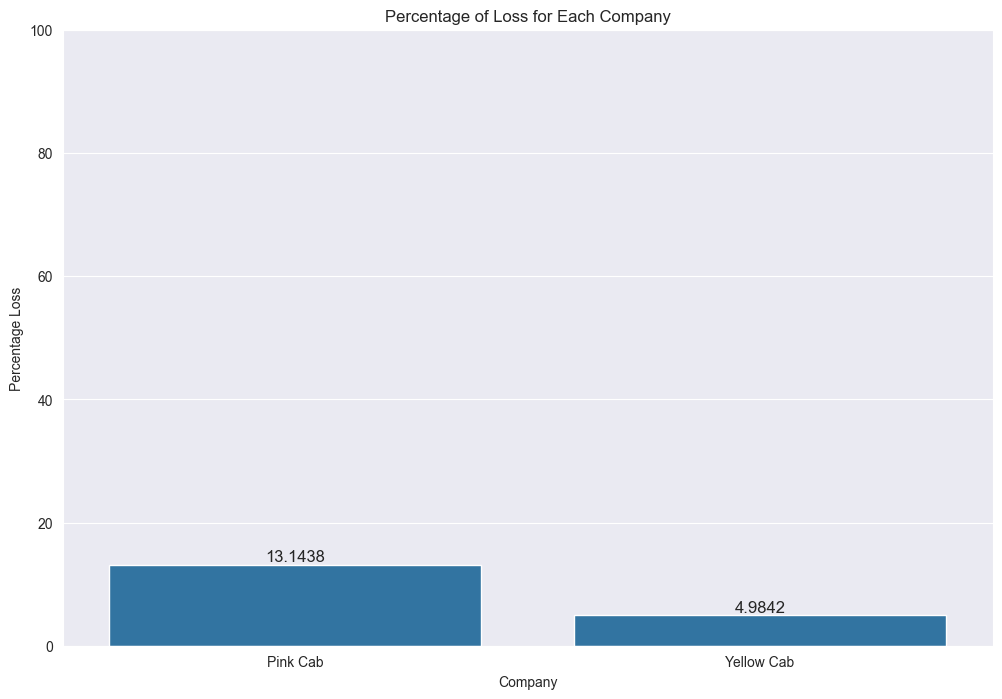

In [78]:
ax = sns.barplot(df_merged, x='Company', y='Percentage Loss')
plt.xlabel('Company')
plt.ylabel('Percentage Loss')
ax.bar_label(ax.containers[0], fontsize=12)
plt.title('Percentage of Loss for Each Company')
plt.ylim(0, 100)
plt.show()

Yellow Cab has smaller loss

In [79]:
df_grouped = df_used.groupby(['Company', 'Year-Month']).agg({'Profit':'sum'}).reset_index()
df_grouped.head()

,Company,Year-Month,Profit
0,Pink Cab,2016-01,73952.863
1,Pink Cab,2016-02,87475.544
2,Pink Cab,2016-03,87801.183
3,Pink Cab,2016-04,82591.853
4,Pink Cab,2016-05,61550.958


In [80]:
df_grouped['Year-Month']=pd.to_datetime(df_grouped['Year-Month'])
df_grouped.dtypes

Company               object
Year-Month    datetime64[ns]
Profit               float64
dtype: object

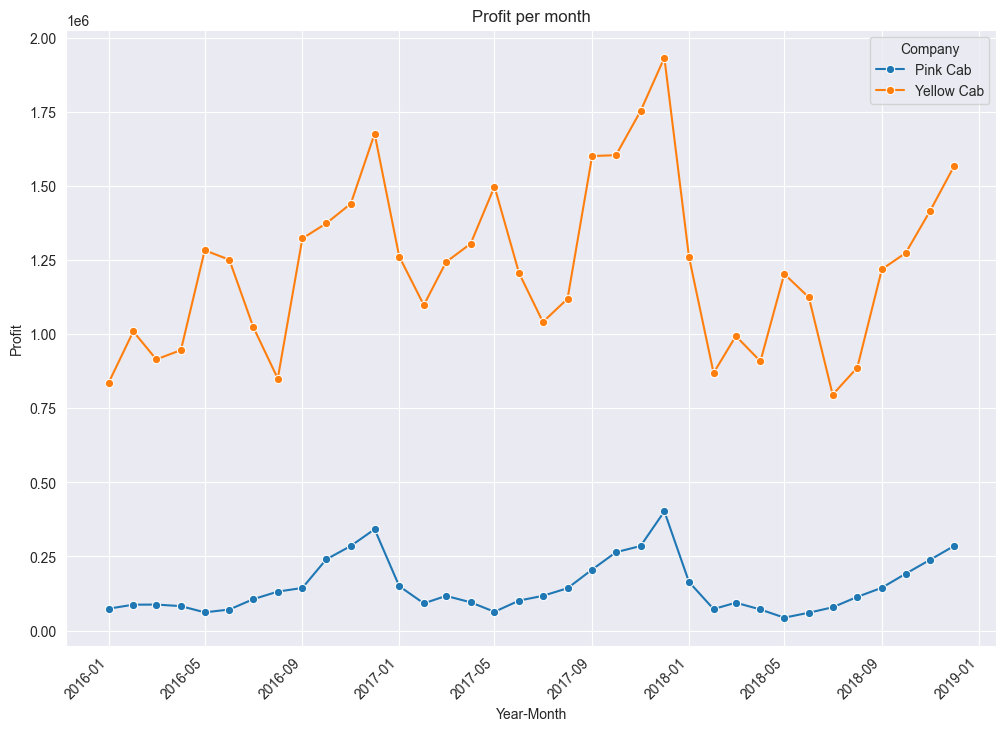

In [81]:
sns.lineplot(data=df_grouped, x='Year-Month', y='Profit', hue='Company', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Profit per month')
plt.show()

Make to quarter

In [82]:
df_quarter = df_used[['Year','Year-Month', 'Profit', 'Company']]
df_quarter['Year-Month'] = pd.to_datetime(df_quarter['Year-Month'])
df_quarter['Quarter'] = df_quarter['Year-Month'].dt.quarter
quarter_mapping = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
df_quarter['Quarter'] = df_quarter['Quarter'].map(quarter_mapping)

df_quarter.head()

/var/folders/11/5vrt54gs4y1ds264xh3_fczm0000gn/T/ipykernel_36549/3587546400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarter['Year-Month'] = pd.to_datetime(df_quarter['Year-Month'])
/var/folders/11/5vrt54gs4y1ds264xh3_fczm0000gn/T/ipykernel_36549/3587546400.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_quarter['Quarter'] = df_quarter['Year-Month'].dt.quarter
/var/folders/11/5vrt54gs4y1ds264xh3_fczm0000gn/T/ipykernel_36549/3587546400.py:5: SettingWithCopyWarning: 
A value is trying to 

,Year,Year-Month,Profit,Company,Quarter
0,2016,2016-01-01,57.315,Pink Cab,Q1
1,2016,2016-01-01,23.666,Pink Cab,Q1
2,2016,2016-01-01,27.568,Pink Cab,Q1
3,2016,2016-01-01,25.798,Pink Cab,Q1
4,2016,2016-01-01,16.844,Pink Cab,Q1


In [83]:
df_grouped = df_quarter.groupby(['Company', 'Year', 'Quarter']).agg({'Profit':'sum'}).reset_index()
df_grouped.head()

,Company,Year,Quarter,Profit
0,Pink Cab,2016,Q1,249229.590
1,Pink Cab,2016,Q2,215246.063
2,Pink Cab,2016,Q3,381375.523
3,Pink Cab,2016,Q4,867660.048
4,Pink Cab,2017,Q1,358923.005


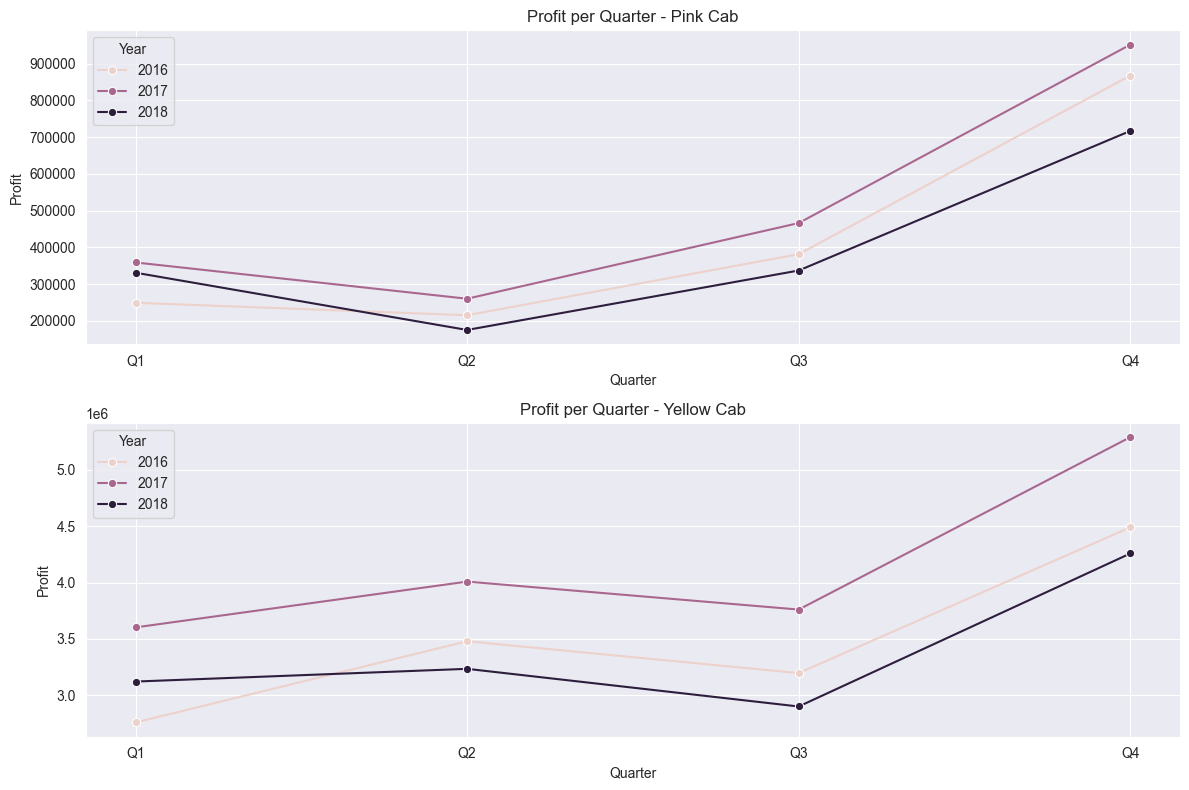

In [84]:
# sns.lineplot(data=df_grouped, x='Quarter', y='Profit', hue='Year', marker='o')
# plt.xticks(rotation=45, ha='right')
# plt.title('Profit per Quarter')
# plt.show()

companies = df_grouped['Company'].unique()

for i, company in enumerate(companies, 1):
    plt.subplot(2,1,i)
    company_data = df_grouped[df_grouped['Company'] == company]
    sns.lineplot(data=company_data, x='Quarter', y='Profit', hue='Year', marker='o')
    plt.title(f'Profit per Quarter - {company}')
    plt.xlabel('Quarter')
    plt.ylabel('Profit')
    plt.legend(title='Year')

plt.tight_layout()
plt.show()


Profits always rise in the third quarter, but will definitely fall in the first quarter of the following year

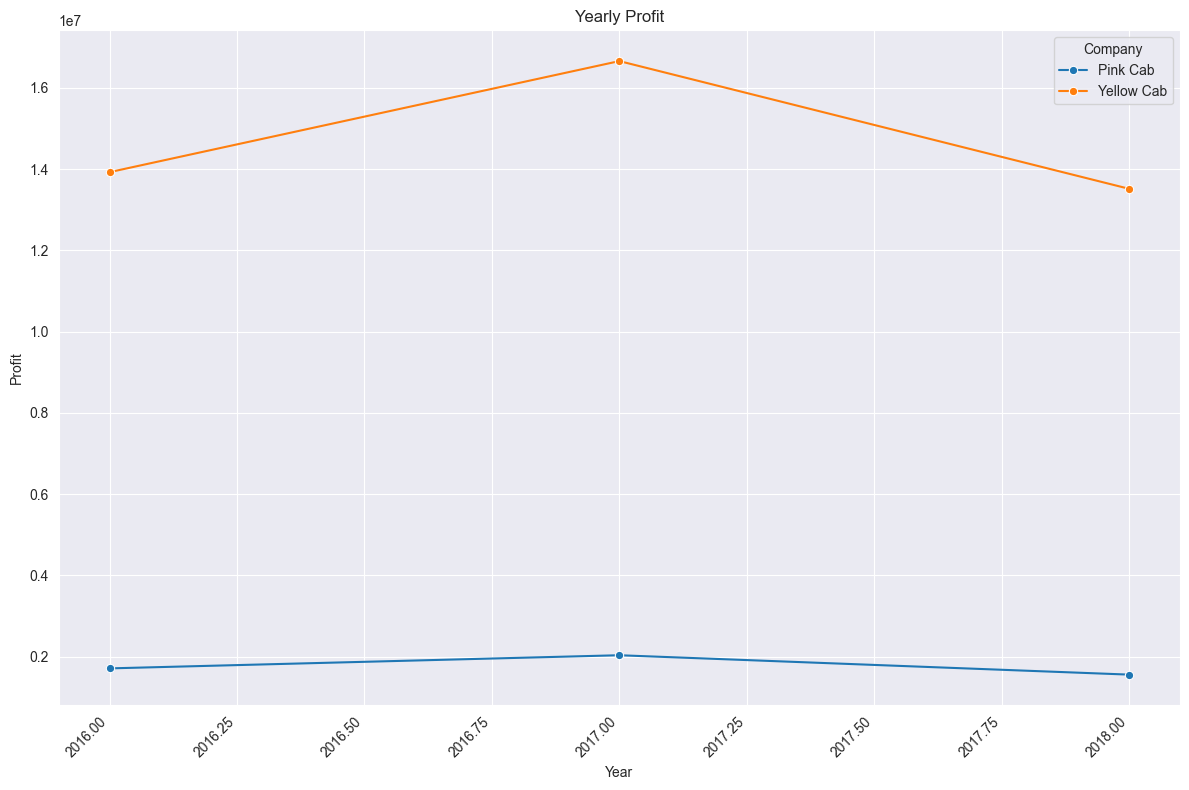

In [85]:
df_grouped = df_used.groupby(['Company', 'Year']).agg({'Profit':'sum'}).reset_index()
df_grouped.head()

sns.lineplot(data=df_grouped, x='Year', y='Profit', hue='Company', marker='o')
plt.xticks(rotation=45, ha='right')
plt.title('Yearly Profit')
plt.tight_layout()
plt.show()

Both companies experienced an increase in profits in 2017, but decreased again in 2018

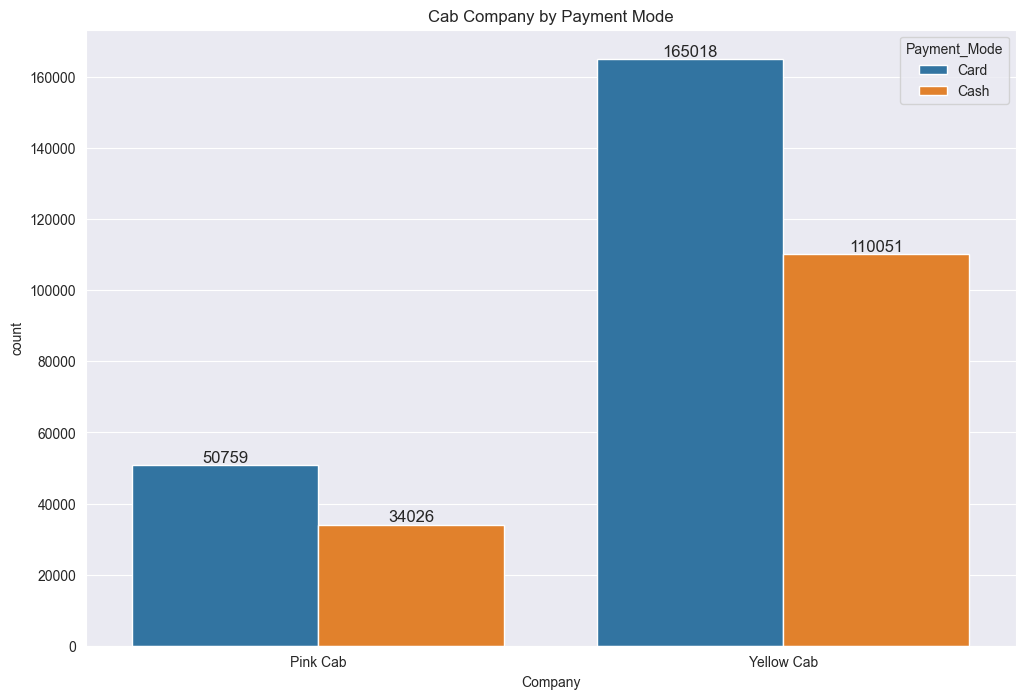

In [86]:
ax = sns.countplot(df_used, x='Company', hue='Payment_Mode')
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)
plt.title('Cab Company by Payment Mode')
plt.show()

In [106]:
df_grouped = df_used.groupby(['Company', 'Age Group','Payment_Mode']).size().reset_index(name='Count')
df_grouped.head()

,Company,Age Group,Payment_Mode,Count
0,Pink Cab,18-24,Card,10001
1,Pink Cab,18-24,Cash,6652
2,Pink Cab,25-29,Card,8168
3,Pink Cab,25-29,Cash,5507
4,Pink Cab,30-34,Card,7852


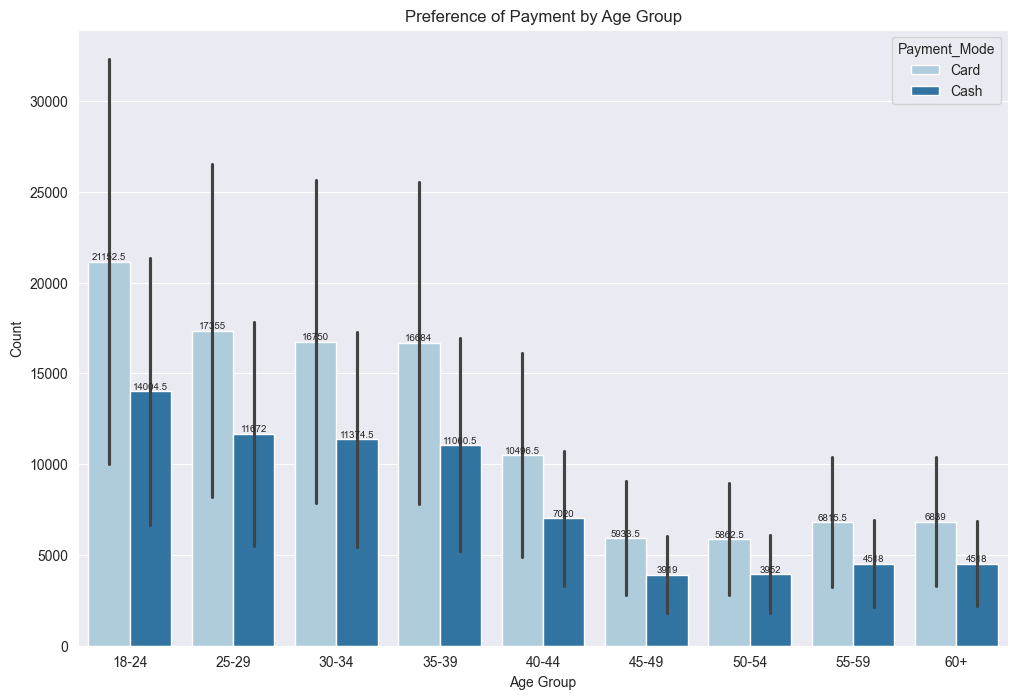

In [107]:
ax = sns.barplot(data=df_grouped, x='Age Group', y='Count', hue='Payment_Mode', palette='Paired')
plt.title('Preference of Payment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
for i in range(2):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

In [110]:
df_grouped = df_used.groupby(['Company', 'Income Group','Payment_Mode']).size().reset_index(name='Count')
df_grouped.head()

,Company,Income Group,Payment_Mode,Count
0,Pink Cab,2000 - 7999,Card,11926
1,Pink Cab,2000 - 7999,Cash,7967
2,Pink Cab,8000 - 14999,Card,14020
3,Pink Cab,8000 - 14999,Cash,9379
4,Pink Cab,15000 - 21999,Card,13971


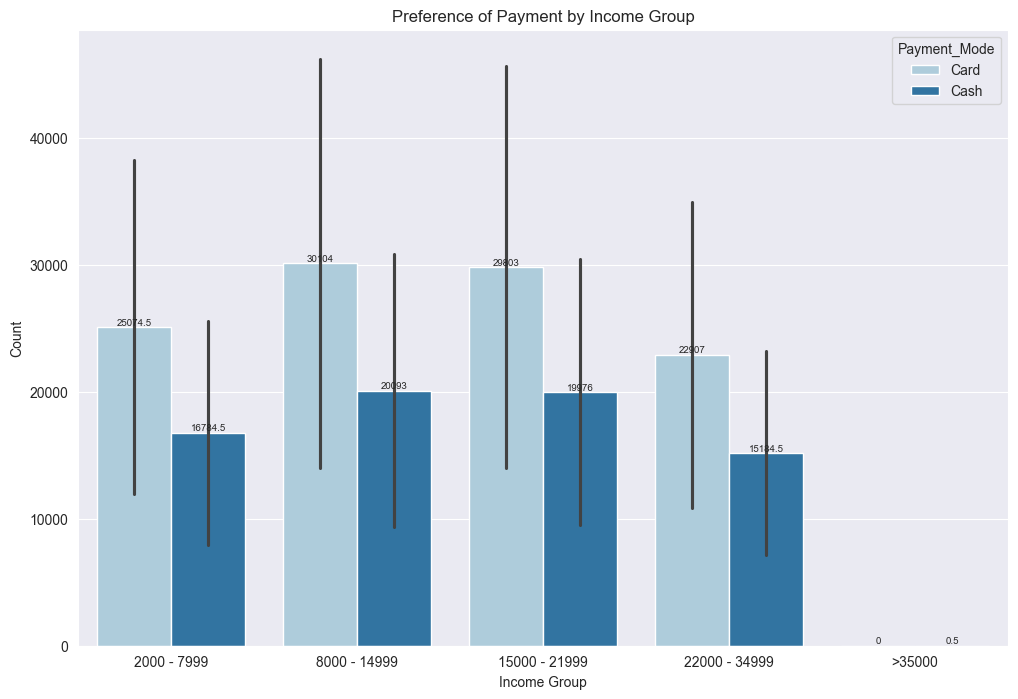

In [112]:
ax = sns.barplot(data=df_grouped, x='Income Group', y='Count', hue='Payment_Mode', palette='Paired')
plt.title('Preference of Payment by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Count')
for i in range(2):
    ax.bar_label(ax.containers[i-1], fontsize=7)
plt.show()

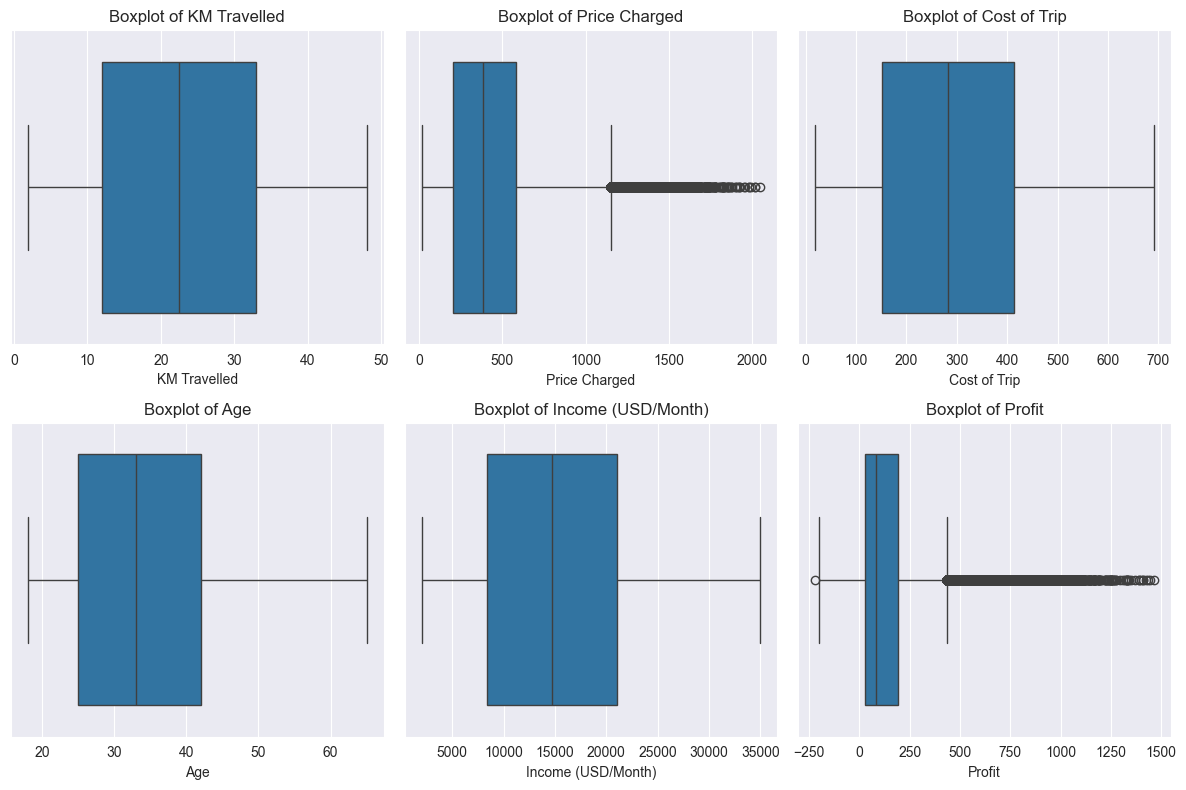

In [87]:
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df_used[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

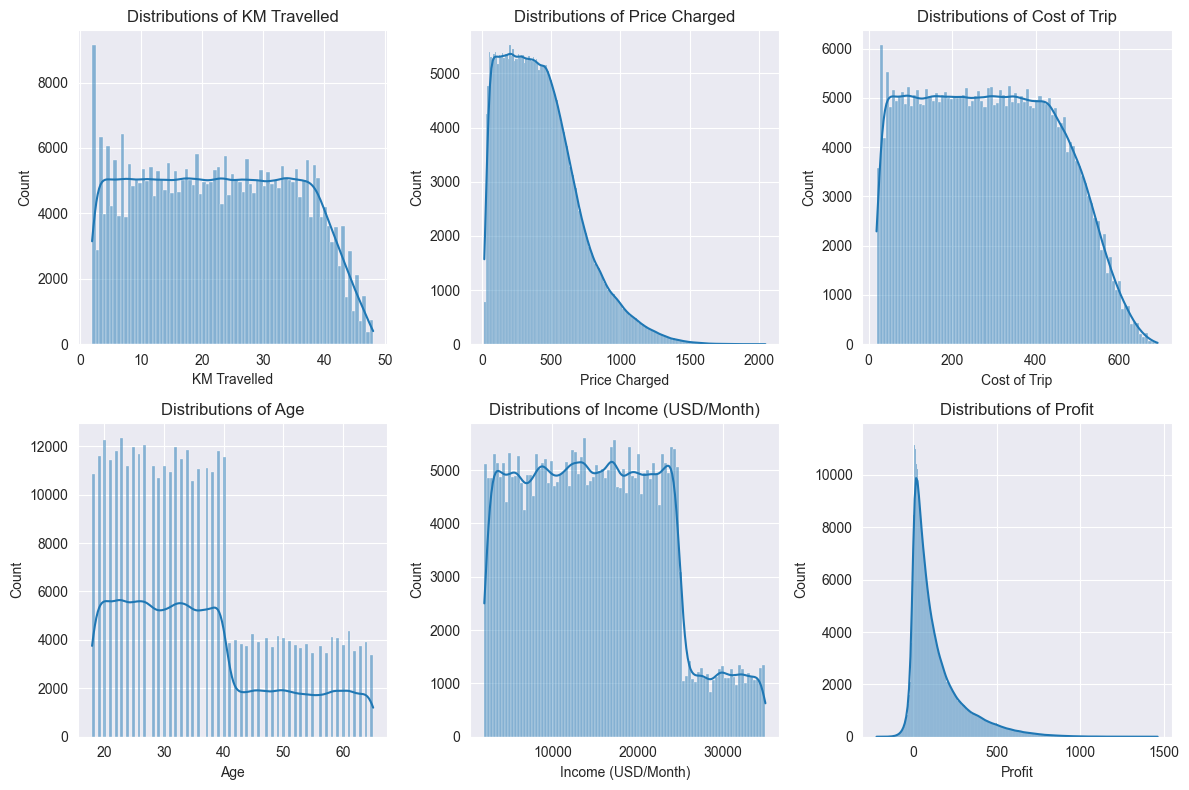

In [90]:
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(x=df_used[col], kde=True)
    plt.title(f'Distributions of {col}')

plt.tight_layout()
plt.show()

In [113]:
df_used.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,Profit,Age Group,Month,Year,Year-Month,Income Group
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,non Holiday,57.315,25-29,1,2016,2016-01,8000 - 14999
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,non Holiday,23.666,25-29,1,2016,2016-01,8000 - 14999
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,non Holiday,27.568,50-54,1,2016,2016-01,8000 - 14999
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,non Holiday,25.798,18-24,1,2016,2016-01,22000 - 34999
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,non Holiday,16.844,30-34,1,2016,2016-01,8000 - 14999


In [120]:
df_grouped = df_used.groupby(['Customer ID', 'Age Group']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_grouped = df_grouped.head()
df_grouped

,Customer ID,Age Group,Count
4437,494,18-24,54
26443,2939,25-29,53
8126,903,60+,52
24887,2766,30-34,51
9624,1070,35-39,51


5 best customers

In [263]:
df_used.to_csv('Dataset/Used_data.csv', encoding='utf-8')

In [264]:
df_used.shape

(359854, 19)

1. Hypothesis: Population Density and Profitability

    - The higher the population density in a city, the greater the demand for taxi services, resulting in higher profits.
    - Business Insights: Understanding the correlation between population density and profitability can guide investment decisions by focusing on cities with growing populations.

2. Hypothesis: Influence of Income on Payment Method

    - As income levels increase, there is a greater likelihood of customers choosing card payments over cash for taxi services.
    - Business Insights: Recognizing the relationship between income and payment preferences can help tailor marketing strategies and payment options to target specific income groups.

3. Hypothesis: Vacations Impact Profitability

    - During holidays, there is a surge in taxi use, increasing profits.
    - Business Insight: Considering the impact of holidays on profits can help with promotional campaign planning and resource allocation during busy periods.

4. Hypothesis: Taxi Use and Productive Age Groups

    - The productive age group (generally 25-55 years) uses taxi services more often.
    - Business Insight: Targeting marketing efforts towards productive age groups can improve customer acquisition and retention strategies.

5. Hypothesis: Relationship between Travel Distance and Cost

    - The longer the distance traveled, the higher the cost of the taxi service.
    - Business Insights: Understanding cost dynamics based on distance can help optimize pricing strategies and improve overall cost efficiency.

Recommendation: 

Yellow Cab is more recommended for investment than Pink Cab